AR(1) Mean Squared Error: 0.45423787997499926


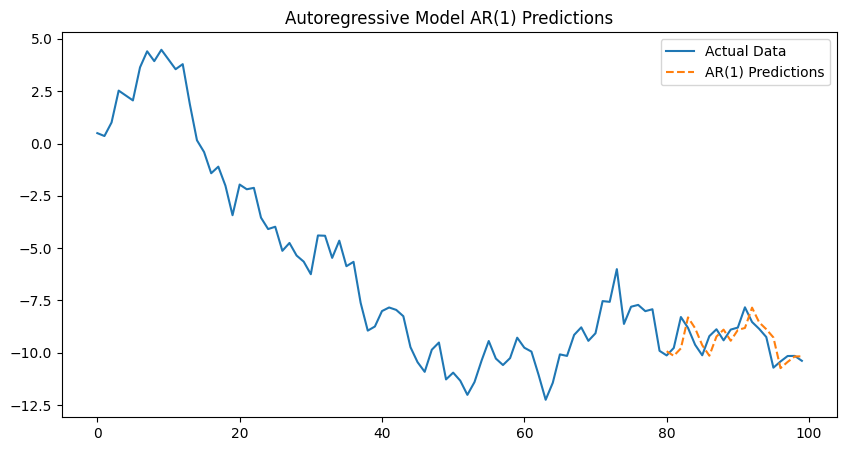

AR(2) Mean Squared Error: 0.45465087015768757


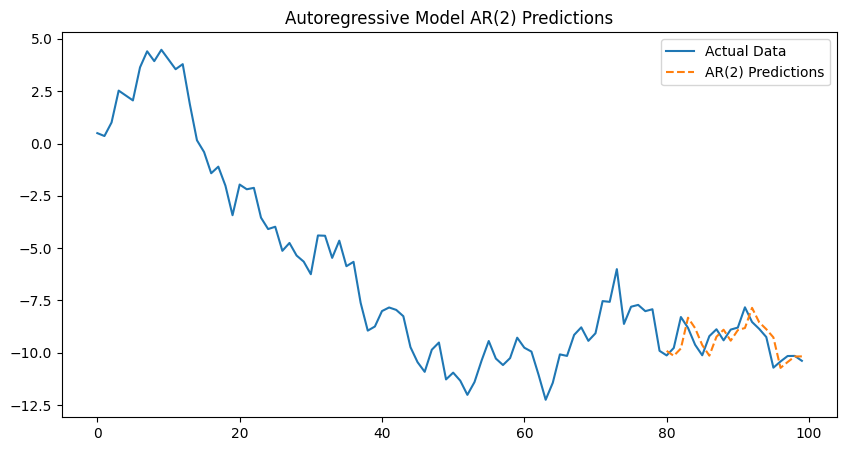

AR(3) Mean Squared Error: 0.44472697191304944


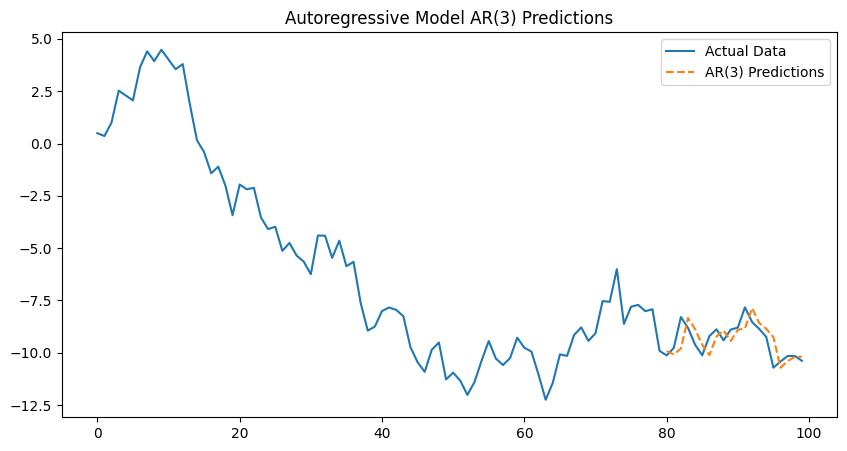

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.cumsum(np.random.randn(100))

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

def autoregressive_model(data, lag):
    """Fits an autoregressive model and predicts future values."""
    X = np.zeros((len(data) - lag, lag))
    y = data[lag:]
    for i in range(len(data) - lag):
        X[i, :] = data[i:i + lag]

    # Solve for coefficients using least squares
    coefficients = np.linalg.solve(X.T @ X, X.T @ y)

    # Predict future values
    predictions = []
    for i in range(len(test)):
        last_values = data[train_size + i - lag:train_size + i]
        prediction = coefficients @ last_values
        predictions.append(prediction)

    return predictions

for lag in [1, 2, 3]:
    predictions = autoregressive_model(data, lag)
    error = np.mean((test - predictions)**2)  # Mean Squared Error
    print(f"AR({lag}) Mean Squared Error:", error)

    plt.figure(figsize=(10, 5))
    plt.plot(data, label='Actual Data')
    plt.plot(range(train_size, len(data)), predictions, label=f'AR({lag}) Predictions', linestyle='dashed')
    plt.legend()
    plt.title(f"Autoregressive Model AR({lag}) Predictions")
    plt.show()